In [ ]:
!pip install face_recognition

In [ ]:
!pip install mtcnn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.9 MB/s eta 0:00:00


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN

# โหลด MTCNN สำหรับตรวจจับใบหน้า
detector = MTCNN()

# โหลดภาพ
image = cv2.imread('/content/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTEwL3Jhd3BpeGVsb2ZmaWNlN19wb3J0cmFpdF9waG90b19iZWF1dGlmdWxfaGVhbHRoX3dvbWFuX2ZhY2Vfd2l0aF84NDA4N2U3ZC1hYjY0LTQxMDItYjViMS0xMmY5NTU0YWMyZGYucG5n.webp')  # หรือใช้ cv2.VideoCapture(0) สำหรับกล้อง

# ตรวจจับใบหน้าและจุดสำคัญ
faces = detector.detect_faces(image)

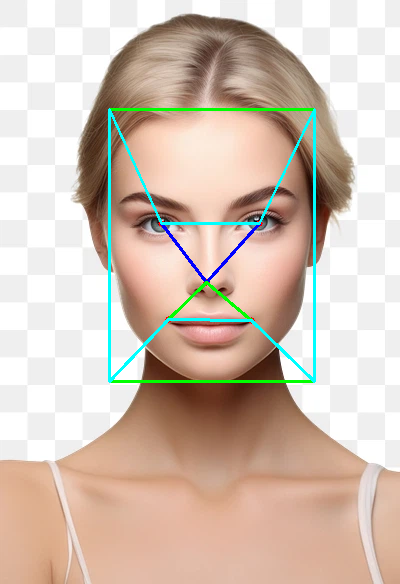

In [ ]:
import cv2
import numpy as np

# สำหรับแต่ละใบหน้า
for face in faces:
  x, y, w, h = face['box']
  keypoints = face['keypoints']

  # จุดสำคัญของใบหน้า
  left_eye = tuple(keypoints['left_eye'])
  right_eye = tuple(keypoints['right_eye'])
  nose = tuple(keypoints['nose'])
  mouth_left = tuple(keypoints['mouth_left'])
  mouth_right = tuple(keypoints['mouth_right'])

  # วาดกรอบใบหน้า
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

  # วาดจุดสำคัญบนใบหน้า
  for point in [left_eye, right_eye, nose, mouth_left, mouth_right]:
      cv2.circle(image, point, 3, (0, 0, 255), -1)

  # วาดเส้นโครงสร้างใบหน้า
  cv2.line(image, left_eye, right_eye, (255, 0, 255), 2)  # เชื่อมตาซ้าย-ขวา
  cv2.line(image, left_eye, nose, (255, 0, 0), 2)  # เชื่อมตาซ้าย-จมูก
  cv2.line(image, right_eye, nose, (255, 0, 0), 2)  # เชื่อมตาขวา-จมูก
  cv2.line(image, nose, mouth_left, (0, 255, 0), 2)  # เชื่อมจมูก-มุมปากซ้าย
  cv2.line(image, nose, mouth_right, (0, 255, 0), 2)  # เชื่อมจมูก-มุมปากขวา
  cv2.line(image, mouth_left, mouth_right, (0, 0, 255), 2)  # เชื่อมมุมปากซ้าย-ขวา

  # วาดเส้นกรอบหน้าผากลงไปถึงคาง
  face_outline = np.array([
      (x, y), left_eye, right_eye, (x + w, y), (x + w, y + h), mouth_right, mouth_left, (x, y + h)
  ], np.int32)
  cv2.polylines(image, [face_outline], isClosed=True, color=(255, 255, 0), thickness=2)


# แสดงผลภาพ
cv2_imshow(image)

# รอจนกว่าจะกดปุ่มใดๆ เพื่อปิดหน้าต่าง
cv2.waitKey(0)
cv2.destroyAllWindows()

✅ ภาพโหลดสำเร็จ!


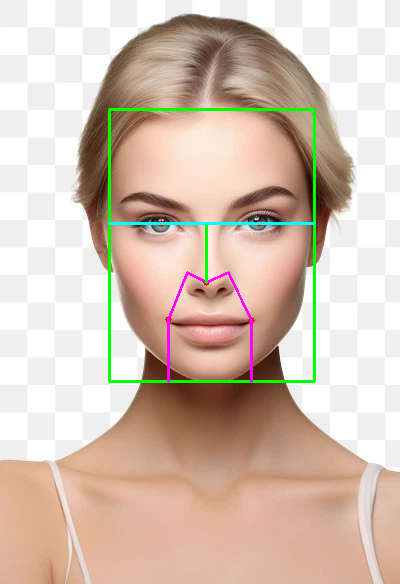

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN

# โหลด MTCNN
detector = MTCNN()

# โหลดภาพจากไฟล์ (ตรวจสอบว่า path ถูกต้อง)
image_path = "/content/cHJpdmF0ZS9sci9pbWFnZXMvd2Vic2l0ZS8yMDIzLTEwL3Jhd3BpeGVsb2ZmaWNlN19wb3J0cmFpdF9waG90b19iZWF1dGlmdWxfaGVhbHRoX3dvbWFuX2ZhY2Vfd2l0aF84NDA4N2U3ZC1hYjY0LTQxMDItYjViMS0xMmY5NTU0YWMyZGYucG5n.webp"  # แก้เป็น path ของไฟล์จริง
image = cv2.imread(image_path)

# ตรวจสอบว่าภาพโหลดสำเร็จไหม
if image is None:
    print("❌ Error: ไม่สามารถโหลดภาพได้ กรุณาตรวจสอบ path ของไฟล์")
else:
    print("✅ ภาพโหลดสำเร็จ!")

    # ตรวจจับใบหน้า
    faces = detector.detect_faces(image)

    # วาดเส้นโค้งเข้าหาจมูก
    def draw_curve(pt1, pt2, control, color):
      curve = np.array([pt1, control, pt2], np.int32).reshape((-1, 1, 2))
      cv2.polylines(image, [curve], isClosed=False, color=color, thickness=2)

    # ฟังก์ชันวาดเส้นโครงสร้างใบหน้า
    def draw_face_structure(image, faces):
        for face in faces:
            x, y, w, h = face['box']
            keypoints = face['keypoints']

            # จุดสำคัญของใบหน้า
            left_eye = tuple(keypoints['left_eye'])
            right_eye = tuple(keypoints['right_eye'])
            nose = tuple(keypoints['nose'])
            mouth_left = tuple(keypoints['mouth_left'])
            mouth_right = tuple(keypoints['mouth_right'])

            # วาดกรอบใบหน้า
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

            # วาดจุดสำคัญบนใบหน้า
            for point in [left_eye, right_eye, nose, mouth_left, mouth_right]:
                cv2.circle(image, point, 3, (0, 0, 255), -1)

            # วาดเส้นโครงสร้างใบหน้า
            cv2.line(image, left_eye, right_eye, (255, 0, 255), 2)
            control_left = ((mouth_left[0] + nose[0]) // 2, nose[1] - 10)
            control_right = ((mouth_right[0] + nose[0]) // 2, nose[1] - 10)
            draw_curve(mouth_left, nose, control_left, (255, 0, 255))
            draw_curve(mouth_right, nose, control_right, (255, 0, 255))
            cv2.line(image, mouth_left,(mouth_left[0],y+h), (255, 0, 255), 2)
            cv2.line(image, mouth_right,(mouth_right[0],y+h), (255, 0, 255), 2)

            # วาดเส้นกรอบหน้าผากลงไปถึงคาง
            cv2.line(image, nose, (nose[0],(left_eye[1]+right_eye[1])//2), (0, 255, 0), 2)

            # เส้นแนวขนานระดับตา
            cv2.line(image, (x, left_eye[1]), (x + w, right_eye[1]), (255, 255, 0), 2)

        return image

    # วาดโครงสร้างใบหน้า
    image = draw_face_structure(image, faces)

    # แสดงผล
    cv2_imshow(image)
